# Zahra Ghahremani


Student ID: 114141861

Collaborate : Yavar Pourmohamad

# CS534 Homework 3

Put your homework in the directory with your name. Please mentionin this file the names of any students with whom you collaborated. If you didn't collaborate with anyone, mark your collaborators as "None." Remember, your goal is to communicate. Full credit will be given only to correct solutions which are described clearly. Convoluted and obtuse descriptions will receive low marks. To complete your homework, you may ONLY consult the following material:

lecture slides course notes you or others took during lecture. the required text (CLRS) websites that may clarify the concepts covered in the material but do not in any way provide complete solutions to the problems. Deadline 04/27/2020

Please provide an answer to the following question:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import model_selection, datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , StratifiedKFold, KFold, cross_validate, learning_curve, GridSearchCV
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Question 1 (10 pts)
Write the explicit constraints (without using any vectorial notation, as a summation of single variables multiplied by a constant + bias term) of the Support Vector Machine to classify correctly iris dataset (Iris-Versicolor vs. others). In particular use 5 points in Iris-Versicolor, 2 points for iris-setosa, and 3 points for iris Virginia. Please show the points you selected and after the constraints

| Sepal.Length (X1) | Sepal.Width (X2) | Petal.Length (X3) | Petal.Width (X4) | Species (Y) |
| --- |  --- |  --- |  --- |  --- | 
|     5.1       |      3.5     |     1.4       |      0.2     |    0    | 
|      4.9      |     3.0      |     1.4       |       0.2    |    0    | 
|      4.7      |     3.2      |      1.3      |      0.2     |    0    | 
|     5.7       |     3.0      |     4.2       |       1.2    |    1    | 
|     5.7       |      2.9     |      4.2      |     1.3      |    1    | 
|      6.2      |     2.9      |     4.3       |     1.3      |    1    | 
|       5.7     |      2.8     |       4.1     |    1.3       |    1    | 
|      5.1      |    2.5       |     3.0       |      1.1     |    1    | 
|      4.6      |      3.1     |       1.5     |     0.2      |    0    | 
|      5.0      |      3.6     |      1.4      |     0.2      |    0    | 

If we assume a buffer = 1, then we will have: 

\begin{equation*}
Y = W^TX+b \\
W = [W_1,...,W_4]
\end{equation*}

\begin{equation*}
5.1W_1 + 3.5W_2 + 1.4W_3 + 0.2W_4 + b < -1 \\
4.9W_1 + 3.0W_2 + 1.4W_3 + 0.2W_4 + b < -1 \\
4.7W_1 + 3.2W_2 + 1.3W_3 + 0.2W_4 + b < -1 \\
5.7W_1 + 3.0W_2 + 4.2W_3 + 1.2W_4 + b > 1 \\
5.7W_1 + 2.9W_2 + 4.2W_3 + 1.3W_4 + b > 1 \\
6.2W_1 + 2.9W_2 + 4.3W_3 + 1.3W_4 + b > 1 \\
5.7W_1 + 2.8W_2 + 4.1W_3 + 1.3W_4 + b > 1 \\
5.1W_1 + 2.5W_2 + 3.0W_3 + 1.1W_4 + b > 1 \\
4.6W_1 + 3.1W_2 + 1.5W_3 + 0.2W_4 + b < -1 \\
5.0W_1 + 3.6W_2 + 1.4W_3 + 0.2W_4 + b < -1 \\
\end{equation*}

# Question 2 (15 pts)

Implement the ADABoost algorithm by using the scikit implementation of the logistic regression. Evaluate the result on a real dataset between a single logistic regression and AdaBoost (use K-Fold cross validation).

This links can be helpful: http://rob.schapire.net/papers/explaining-adaboost.pdf and https://en.wikipedia.org/wiki/AdaBoost


In [ ]:
breast_cancer = datasets.load_breast_cancer()
Data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
Target = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
Target_labelencoder = LabelEncoder()
Target = Target_labelencoder.fit_transform(Target)
Data_train, Data_test, Target_train, Target_test = train_test_split(np.array(Data), np.array(Target), test_size = 0.3, random_state = 1000)

In [ ]:
def AdaBoost(Data_train, Target_train, folds = 5, M = 10, learning_rate = 1):
  #Setup K-folds
  skf = KFold(n_splits = folds, random_state = 1000, shuffle = True)
  acc_train = []
  acc_valid = []
  acc_valid_logistic = []

  for train_index, valid_index in skf.split(Data_train, Target_train):
    Data_train_fold = Data_train[train_index]
    Data_valid_fold = Data_train[valid_index]
    Target_train_fold = Target_train[train_index]
    Target_valid_fold = Target_train[valid_index]
    #Initialize the sample weights
    Estimator_list = []
    Estimator_error_list = []
    Target_predict_list_train = []
    Target_predict_list_valid = []
    Estimator_weight_list = []
    Sample_weight_list = []

    N1 = len(Target_valid_fold)
    N2 = len(Target_train_fold)
    Sample_weight = np.ones(N2) / N2
    Sample_weight_list.append(Sample_weight.copy())
    #Training logistic classifier for each fold
    lg_fold = LogisticRegression(random_state = 1000)
    clf = lg_fold.fit(Data_train_fold, Target_train_fold)
    acc_valid_logistic.append(clf.score(Data_valid_fold, Target_valid_fold))
    print('Accuracy for logistic regression of a single fold is: {acc}'.format(acc = clf.score(Data_valid_fold, Target_valid_fold)))
    #fit a classifier
    for m in range(M):
      Estimator = LogisticRegression()
      Estimator.fit(Data_train_fold, Target_train_fold, sample_weight = Sample_weight)
      Target_predict_train = Estimator.predict(Data_train_fold)
      Target_predict_valid = Estimator.predict(Data_valid_fold)
      #Misclassifications
      Incorrect = (Target_predict_train != Target_train_fold)
      #Estimator error
      Estimator_error = np.mean(np.average(Incorrect, weights = Sample_weight, axis = 0))
      #Boost estimator weights
      Estimator_weight =  learning_rate * np.log((1. - Estimator_error) / Estimator_error)
      #Boost sample weights
      Sample_weight *= np.exp(Estimator_weight * Incorrect * ((Sample_weight > 0) | (Estimator_weight < 0)))
      #Save iteration values
      Estimator_list.append(Estimator)
      Estimator_error_list.append(Estimator_error.copy())
      Target_predict_list_train.append(Target_predict_train.copy())
      Target_predict_list_valid.append(Target_predict_valid.copy())
      Estimator_weight_list.append(Estimator_weight.copy())
      Sample_weight_list.append(Sample_weight.copy())
    #Convert to np array for convenience  
    Estimator_list = np.asarray(Estimator_list)
    Estimator_error_list = np.asarray(Estimator_error_list)
    Target_predict_list_train = np.asarray(Target_predict_list_train)
    Target_predict_list_valid = np.asarray(Target_predict_list_valid)
    Estimator_weight_list = np.asarray(Estimator_weight_list)
    Sample_weight_list = np.asarray(Sample_weight_list)
    #Predictions
    preds_valid = (np.array([np.sign((Target_predict_list_valid[:,point] * Estimator_weight_list).sum()) for point in range(N1)]))
    acc_valid.append((preds_valid == Target_valid_fold).sum() / N1)
    preds_train = (np.array([np.sign((Target_predict_list_train[:,point] * Estimator_weight_list).sum()) for point in range(N2)]))
    acc_train.append((preds_train == Target_train_fold).sum() / N2)
    print('Accuracy for AdaBoost of a single fold is: {acc}'.format(acc = (preds_valid == Target_valid_fold).sum() / N1))
    print('######################################################################################')
  
  print('######################################################################################')
  print("Accuracy of Training data with AdaBoost: ",np.mean(acc_train))
  print("Accuracy of K-fold cross validation with AdaBoost: ",np.mean(acc_valid))
  print("Accuracy of K-fold cross validation with Logistic regression: ",np.mean(acc_valid_logistic))
  return Estimator_list, Estimator_weight_list, Sample_weight_list

In [ ]:
# Using 10 folds
Estimator_list, Estimator_weight_list, Sample_weight_list = AdaBoost(Data_train, Target_train, 10, learning_rate = 1)

Accuracy for logistic regression of a single fold is: 0.925
Accuracy for AdaBoost of a single fold is: 0.4
######################################################################################
Accuracy for logistic regression of a single fold is: 0.925
Accuracy for AdaBoost of a single fold is: 0.375
######################################################################################
Accuracy for logistic regression of a single fold is: 0.925
Accuracy for AdaBoost of a single fold is: 0.55
######################################################################################
Accuracy for logistic regression of a single fold is: 0.95
Accuracy for AdaBoost of a single fold is: 0.875
######################################################################################
Accuracy for logistic regression of a single fold is: 0.975
Accuracy for AdaBoost of a single fold is: 0.95
######################################################################################
Accuracy for logistic reg

In [ ]:
#Using 6 folds   
Estimator_list, Estimator_weight_list, Sample_weight_list = AdaBoost(Data_train, Target_train, 6, learning_rate = 1)

Accuracy for logistic regression of a single fold is: 0.9104477611940298
Accuracy for AdaBoost of a single fold is: 0.4626865671641791
######################################################################################
Accuracy for logistic regression of a single fold is: 0.9552238805970149
Accuracy for AdaBoost of a single fold is: 0.8208955223880597
######################################################################################
Accuracy for logistic regression of a single fold is: 0.9393939393939394
Accuracy for AdaBoost of a single fold is: 0.9242424242424242
######################################################################################
Accuracy for logistic regression of a single fold is: 0.9393939393939394
Accuracy for AdaBoost of a single fold is: 0.6212121212121212
######################################################################################
Accuracy for logistic regression of a single fold is: 0.9545454545454546
Accuracy for AdaBoost of a single fold 

In [ ]:
#Using 4 folds
Estimator_list, Estimator_weight_list, Sample_weight_list = AdaBoost(Data_train, Target_train, 4, learning_rate = 1)

Accuracy for logistic regression of a single fold is: 0.93
Accuracy for AdaBoost of a single fold is: 0.46
######################################################################################
Accuracy for logistic regression of a single fold is: 0.94
Accuracy for AdaBoost of a single fold is: 0.91
######################################################################################
Accuracy for logistic regression of a single fold is: 0.9191919191919192
Accuracy for AdaBoost of a single fold is: 0.47474747474747475
######################################################################################
Accuracy for logistic regression of a single fold is: 0.9595959595959596
Accuracy for AdaBoost of a single fold is: 0.8383838383838383
######################################################################################
######################################################################################
Accuracy of Training data with AdaBoost:  0.6809779802922493
Accuracy of K-fold 

In [ ]:
#Using 2 folds
Estimator_list, Estimator_weight_list, Sample_weight_list = AdaBoost(Data_train, Target_train, 2, learning_rate = 1)

Accuracy for logistic regression of a single fold is: 0.9396984924623115
Accuracy for AdaBoost of a single fold is: 0.9045226130653267
######################################################################################
Accuracy for logistic regression of a single fold is: 0.9447236180904522
Accuracy for AdaBoost of a single fold is: 0.38190954773869346
######################################################################################
######################################################################################
Accuracy of Training data with AdaBoost:  0.6407035175879398
Accuracy of K-fold cross validation with AdaBoost:  0.6432160804020101
Accuracy of K-fold cross validation with Logistic regression:  0.9422110552763818


AdaBoost is overtrained when the number of folds is greater than 6. As indicated, 2 folds has the best validation accuracy and in conclusion, the Logistic regression outperforms the AdaBoosting in this example



## Question 3 (10 pts)
Use DBscan (try with different parameters) and K-means (K=3) on IRIS Dataset and discuss/compare the results with the iris ground truth.
Please provide an explanation of why K-fold cross validation is not required for the comparison among these different algorithms.

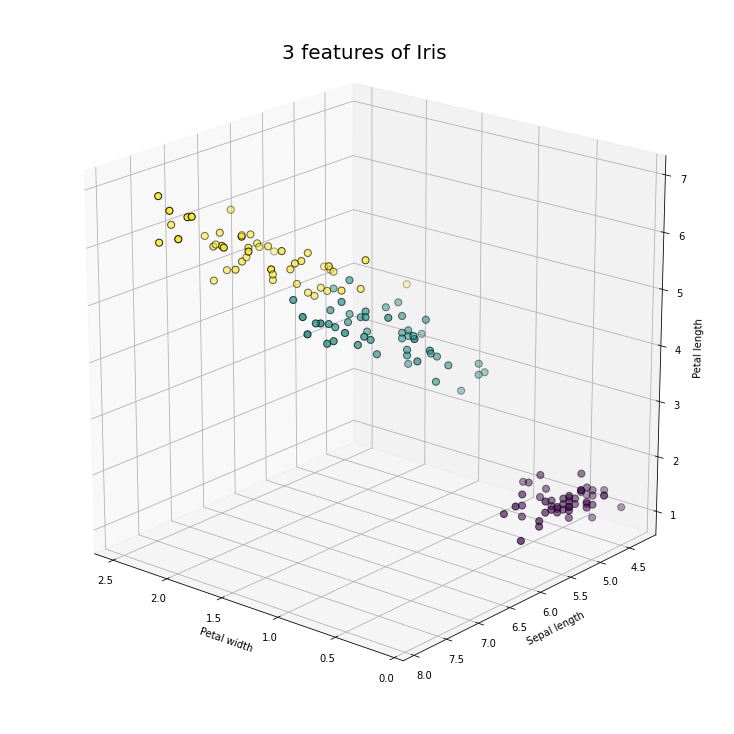

In [ ]:
iris = datasets.load_iris()
Data = iris.data
Target = iris.target

fig = plt.figure(1, figsize = (10,10))
ax = Axes3D(fig, rect = [0, 0, 1, 1], elev = 20, azim = 130)
ax.scatter(Data[:, 3], Data[:, 0], Data[:, 2], c = Target, edgecolor = "k", s = 50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("3 features of Iris ", fontsize = 20)
plt.show()

#DbScan

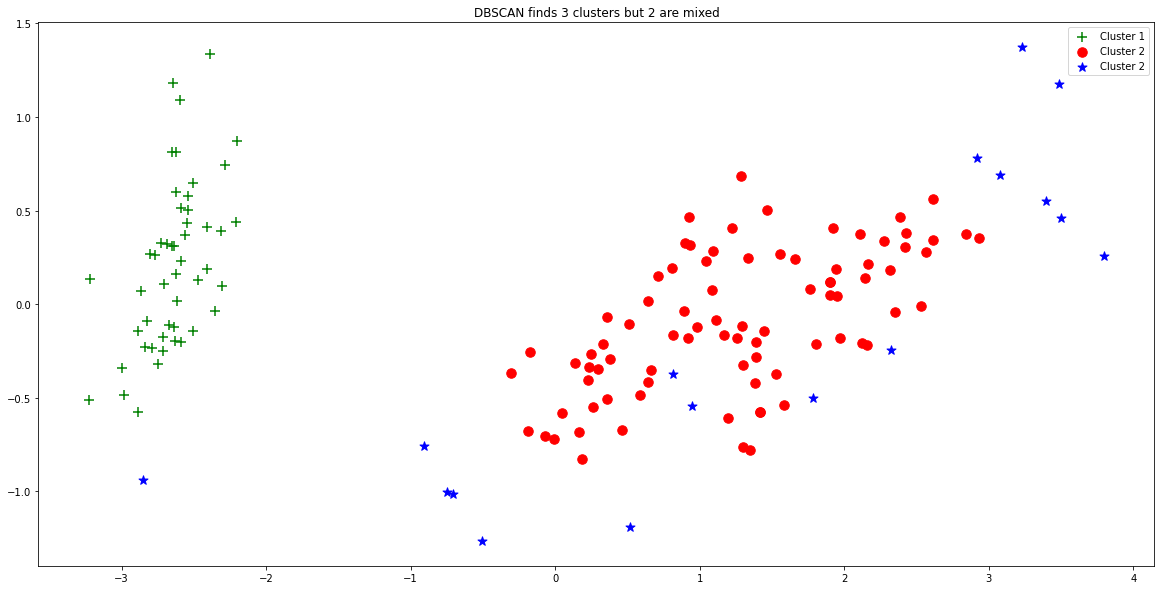

In [ ]:
#DbScan with eps = 0.5 and min_samples = 5:
dbscan = DBSCAN()
db = dbscan.fit(Data)
pca = PCA(n_components = 2).fit(Data)
pca_2d = pca.transform(Data)
plt.figure(figsize=(20,10))

for i in range(0, pca_2d.shape[0]):
  if dbscan.labels_[i] == 0:
    c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], s = 90, c='g', marker='+')
  elif dbscan.labels_[i] == 1:
    c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], s = 90, c='r', marker='o')
  elif dbscan.labels_[i] == -1:
    c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], s = 90, c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 2'])
plt.title('DBSCAN finds 3 clusters but 2 are mixed')
plt.show()

In [ ]:
# Looking at some scores for DbScan
labels = db.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(Target, labels))
print("Completeness: %0.3f" % metrics.completeness_score(Target, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(Target, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(Target, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(Target, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Data, labels))

Homogeneity: 0.560
Completeness: 0.657
V-measure: 0.604
Adjusted Rand Index: 0.521
Adjusted Mutual Information: 0.599
Silhouette Coefficient: 0.486


Using different parameters

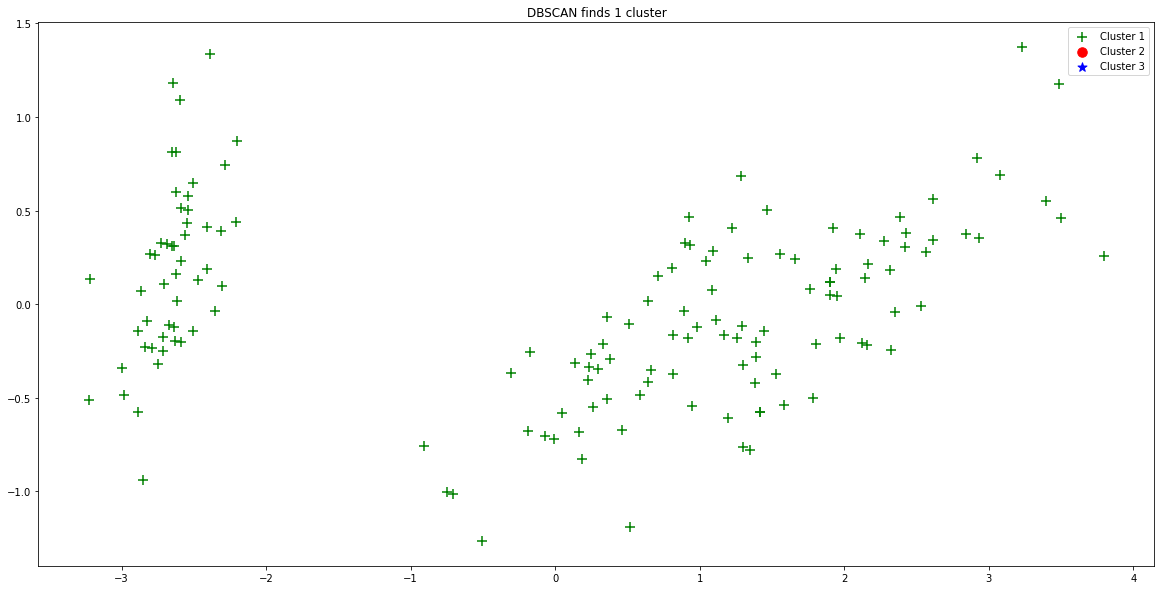

In [ ]:
#DbScan with eps = 5 and min_samples = 2:
dbscan = DBSCAN(eps = 5, min_samples = 2)
db = dbscan.fit(Data)
pca = PCA(n_components = 2).fit(Data)
pca_2d = pca.transform(Data)
plt.figure(figsize=(20,10))

for i in range(0, pca_2d.shape[0]):
  if dbscan.labels_[i] == 0:
    c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], s = 90, c='g', marker='+')
  elif dbscan.labels_[i] == 1:
    c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], s = 90, c='r', marker='o')
  elif dbscan.labels_[i] == -1:
    c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], s = 90, c='b', marker='*')
    
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('DBSCAN finds 1 cluster')
plt.show()

In [ ]:
labels = db.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(Target, labels))
print("Completeness: %0.3f" % metrics.completeness_score(Target, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(Target, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(Target, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(Target, labels))

Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


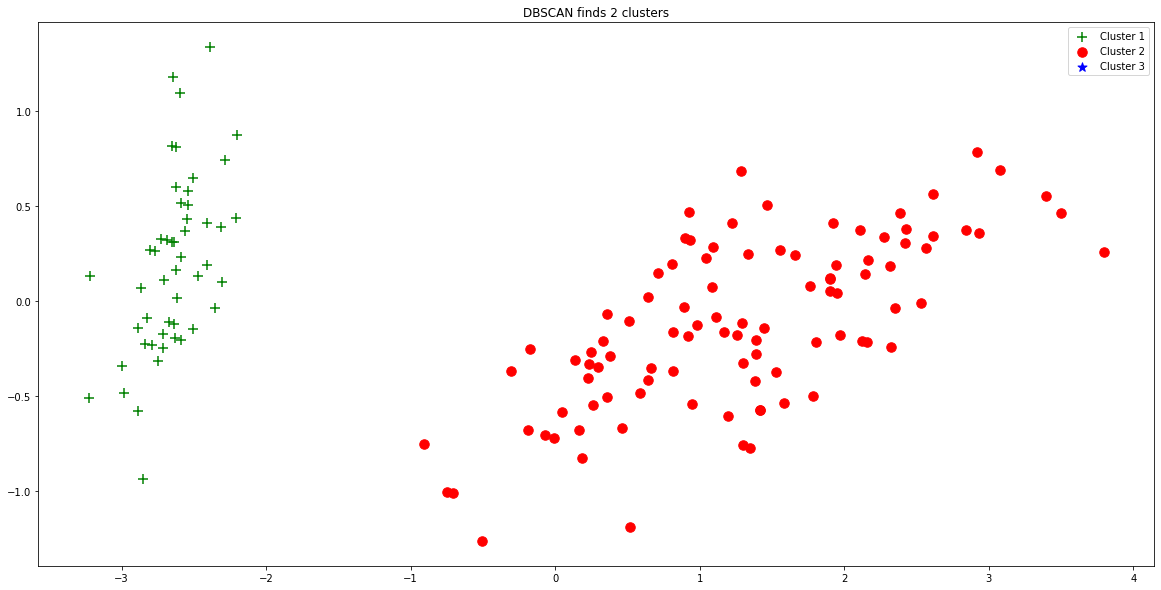

In [ ]:
# Changing parameters
dbscan=DBSCAN(eps = 0.8, min_samples = 2)
db=dbscan.fit(Data)
pca=PCA(n_components = 2).fit(Data)
pca_2d=pca.transform(Data)
plt.figure(figsize=(20,10))

for i in range(0, pca_2d.shape[0]):
  if dbscan.labels_[i] == 0:
    c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], s = 90, c='g', marker='+')
  elif dbscan.labels_[i] == 1:
    c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], s = 90, c='r', marker='o')
  elif dbscan.labels_[i] == -1:
    c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], s = 90, c='b', marker='*')
        
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('DBSCAN finds 2 clusters')
plt.show()

In [ ]:
labels = db.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(Target, labels))
print("Completeness: %0.3f" % metrics.completeness_score(Target, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(Target, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(Target, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(Target, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Data, labels))

Homogeneity: 0.588
Completeness: 0.920
V-measure: 0.717
Adjusted Rand Index: 0.564
Adjusted Mutual Information: 0.713
Silhouette Coefficient: 0.512


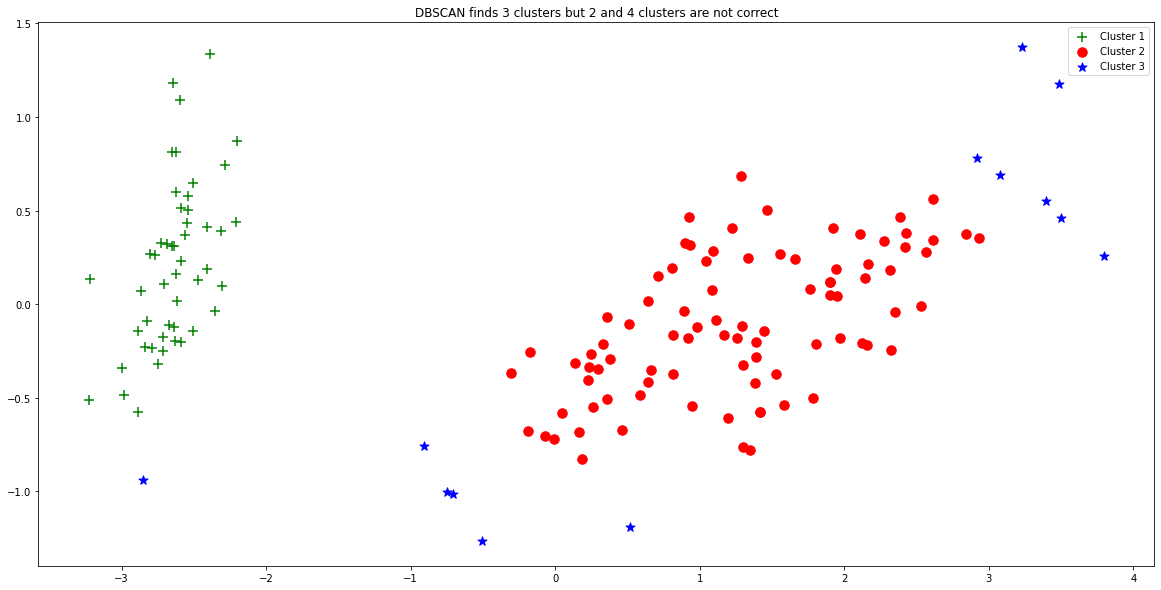

In [ ]:
dbscan=DBSCAN(eps = 0.6, min_samples = 10)
db=dbscan.fit(Data)
pca=PCA(n_components = 2).fit(Data)
pca_2d=pca.transform(Data)
plt.figure(figsize=(20,10))

for i in range(0, pca_2d.shape[0]):
  if dbscan.labels_[i] == 0:
    c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], s = 90, c='g', marker='+')
  elif dbscan.labels_[i] == 1:
    c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], s = 90, c='r', marker='o')
  elif dbscan.labels_[i] == -1:
    c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], s = 90, c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('DBSCAN finds 3 clusters but 2 and 4 clusters are not correct')
plt.show()

In [ ]:
labels = db.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(Target, labels))
print("Completeness: %0.3f" % metrics.completeness_score(Target, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(Target, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(Target, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(Target, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Data, labels))

Homogeneity: 0.563
Completeness: 0.694
V-measure: 0.622
Adjusted Rand Index: 0.530
Adjusted Mutual Information: 0.616
Silhouette Coefficient: 0.542


#K-Means

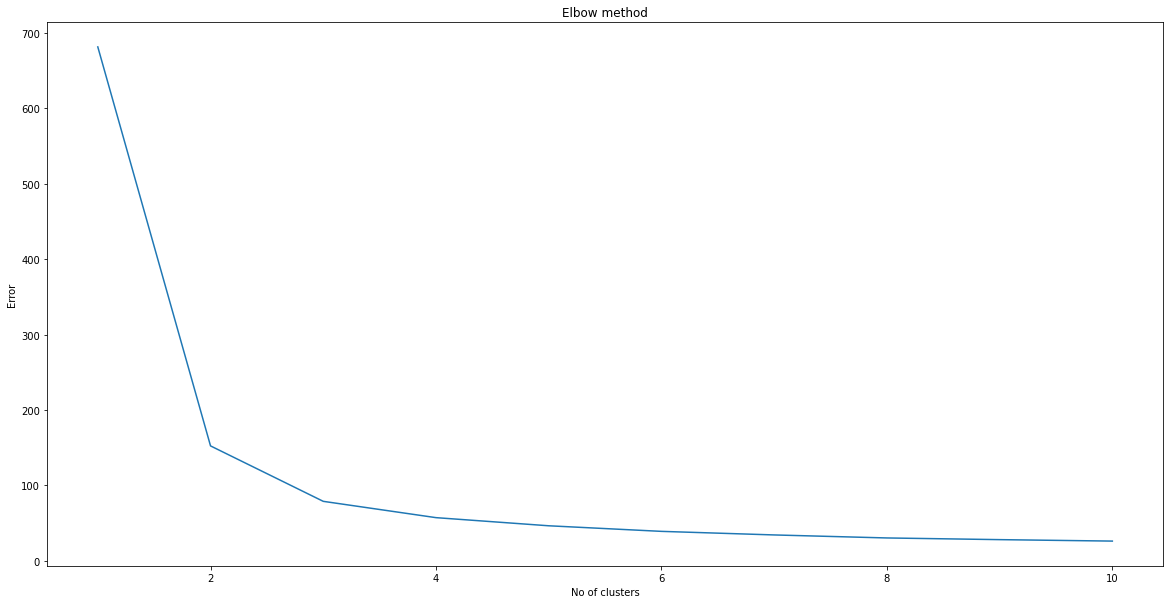

In [ ]:
#Finding optimum number of cluster with Elbow method
Error =[]
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i).fit(Data)
  kmeans.fit(Data)
  Error.append(kmeans.inertia_)
  
plt.figure(figsize=(20,10))
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

3 clusters is the optimum number.

Homogeneity: 0.751
Completeness: 0.765
V-measure: 0.758
Adjusted Rand Index: 0.730
Adjusted Mutual Information: 0.755
Silhouette Coefficient: 0.553


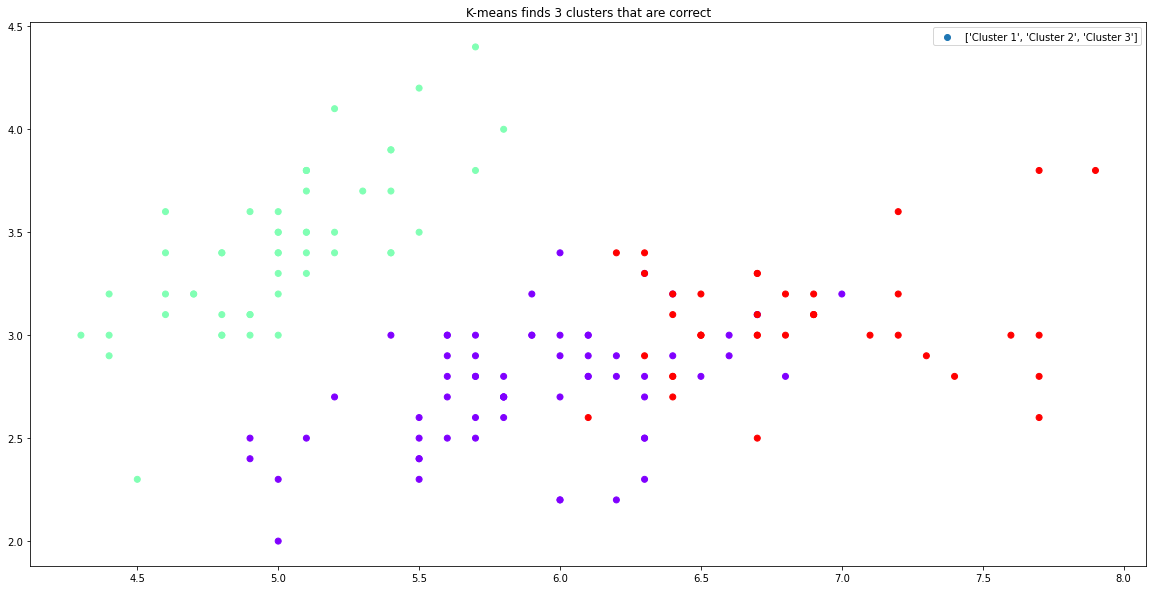

In [ ]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(Data)
labels = y_kmeans

plt.figure(figsize=(20,10))
plt.scatter(Data[:,0], Data[:,1], c = y_kmeans, cmap = 'rainbow',  label=['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.legend()
plt.title('K-means finds 3 clusters that are correct')

print("Homogeneity: %0.3f" % metrics.homogeneity_score(Target, labels))
print("Completeness: %0.3f" % metrics.completeness_score(Target, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(Target, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(Target, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(Target, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Data, labels))

- Conclusion

We can determine the number of clusters using its two input arguments through DbScan, but we can not say that the number of clusters is the most optimum. We can use DbScan to determine whether the minimum number of points is close enough to one another to be able to say that they are part of a single cluster.
The number of centroids, however, is necessary for computing and finding the optimum number of clusters in K_means. We can use different indices such Sillhout index. Generally, the performance of the K_means is better than DbScan here and it is also easier to optimize. 

- Advantages of KMeans and DbScan: 1- K_means is faster than DbScan, 2- We don't need the number of clusters in DbScan.

Disadvantages of KMeans and DBScan: 1- The number of clusters hidden in the dataset is required in K_means, 2- If we have clusters with different densities, DbScan is not a good option and it does not perform perfectly 3- We need to be careful in the selection of parameters in DbScan.

- Why is not required cross-validation?

Labeled data as ground truth is necessary when cross-validation is performing. In this case, however, we can count the number of classes in the ground truth dataset and then consider that as the optimal value for K, and therefore, we don't need class validation.

Because we have a precise explanation of the error in supervised learning that shows the performance of f(x) in the estimation of y, we can use cross-validation. We actually, use cross-validation here to have an estimate of out-of-sample error of model and use it as a mode selection.

In opposite, in unsupervised learning, we don't have a clear definition of error, so cross-validation is not a good option. However, sometimes we can use other cluster stability measures such as unsupervised performance evaluation instead of cross-validation. 

# Extra Points ( 5pts)
An unbalanced dataset (e.g. 95% vs 5%) can be problematic even in the training phase. The learned function can be trivial, e.g. always predicting one class.
A possible solution can have a weight for each point in the way that making a mistake in the minority class will coun more w.r.t. the other. Please redefine the likelihood of the logistic regression to consider these weights for each point. Please compute the log-likelihood and its derivatives.
In addition, add to the negative log-likelihood the norm of W (sum of the square of each component) and compute the derivatives.

Using the make_classiffication() function to show a synthetic imbalanced two class classification dataset. 

Creating 10000 examples with minority to majority class ratio (1:100).

At first, let's generate an imbalanced classification dataset and plot it.

Counter({0: 9500, 1: 500})


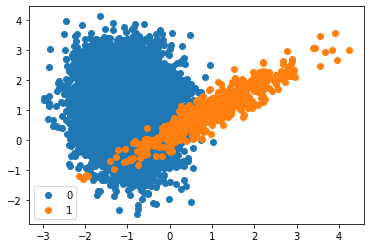

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# Defining dataset
X, y = make_classification(n_samples = 10000,
                           n_features = 2,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           weights = [0.95],
                           flip_y = 0,
                           random_state = 2)
# Summarizing class distribution
counter = Counter(y)
print(counter)
# Scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Resukts shows that the class distribution ratio is 5:95 (majority: minority class).

The complete example of evaluated standard logistic regression on the imbalanced classification problem is listed below. Now, let's fit a logistic regression model on an imbalanced classification dataset


In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# generate dataset
X, y = make_classification(n_samples = 10000,
                           n_features = 2,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           weights = [0.95],
                           flip_y = 0,
                           random_state = 2)
# define model
model = LogisticRegression(solver = 'lbfgs')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits = 10,
                             n_repeats = 3,
                             random_state = 1)
# evaluate model
scores = cross_val_score(model, X, y, scoring = 'roc_auc', cv = cv, n_jobs = -1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.974


I predict that the performance of the class-weighted version of logistic regression is better than the standard version (without class-weighted).



In [ ]:
#Complete example
# Weighted logistic regression model
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# generate dataset
X, y = make_classification(n_samples = 10000,
                           n_features = 2,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           weights = [0.95],
                           flip_y = 0,
                           random_state = 2)
# define model
weights = {0:0.01, 1:1.0}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits = 10,
                             n_repeats = 3,
                             random_state = 1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.977




The result here shows that we have a better score than the unweighted version of logistic regression. Below is an example of weighted logistic regression for class imbalance with heuristic weights:

In [ ]:
# Using default class balance with the logistic regression class through setting the class-weighted argument to balanced
# weighted logistic regression for class imbalance with heuristic weights
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# generate dataset
X, y = make_classification(n_samples = 10000,
                           n_features = 2,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           weights = [0.95],
                           flip_y = 0,
                           random_state = 2)
# define model
model = LogisticRegression(solver='lbfgs', class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits = 10,
                             n_repeats = 3,
                             random_state = 1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.980



We can see that mean ROC AUC here is the same as the ROC AUC that we got from specifying the inverse class ratio manually.